# Tutorial 3b: Probability distributions and their stories

(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from an Jupyter notebook.  You can download the notebook [here](t3b_probability_stories.ipynb).*


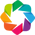

Loading BokehJS ...

In [1]:
import numpy as np
import scipy.stats as st
import scipy.special

import bebi103

import bokeh.io
import bokeh.plotting

import holoviews as hv

hv.extension('bokeh')
bokeh.io.output_notebook()

# Suppress logging info about Bokeh apps
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

Because this tutorial consists mainly of a list of probability distributions and their stories and properties, it is useful to have a little index of them up front.

* [Discrete distributions](#Discrete-distributions)
    - [Bernoulli distribution](#Bernoulli-distribution)
    - [Geometric distribution](#Geometric-distribution)
    - [Negative Binomial distribution](#Negative-Binomial-distribution)
    - [Binomial distribution](#Binomial-distribution)
    - [Hypergeometric distribution](#Hypergeometric-distribution)
* [Continuous distributions](#Continuous-distributions)
    - [Uniform distribution](#Uniform-distribution)
    - [Gaussian (a.k.a. Normal) distribution](#Gaussian,-a.k.a.-Normal,-distribution)
    - [Log-Normal distribution](#Log-Normal-distribution)
    - [Von Mises distribution](#Von-Mises-distribution)
    - [Chi-square distribution](#Chi-square-distribution)
    - [Student-t/Cauchy distribution](#Student-t/Cauchy-distribution)
    - [Exponential distribution](#Exponential-distribution)
    - [Gamma distribution](#Gamma-distribution)
    - [Weibull distribution](#Weibull-distribution)
    - [Beta distribution](#Beta-distribution)
* [Discrete multivariate distributions](#Discrete-multivariate-distributions)
    - [Multinomial distribution](#Multinomial-distribution)
* [Continuous multivariate distributions](#Continuous-Multivariate-distributions)
    - [Multivariate Gaussian distribution](#Multivariate-Gaussian-distribution)
    - [Dirichlet distribution](#Dirichlet-distribution)

This tutorial also features interactive plotting, which needs a running Jupyter notebook to utilize. You should therefore download and run the notebook. Before you do, make sure that your `bebi103` module is up to date by running the following on the command line.

    pip install bebi103 --upgrade
    
Furthermore, when you launch your notebook, take note of the URL. You can find this at the top of your browser. It will be something like `localhost:8888`. Before you work through the notebook, define your notebook_url in the code cell below.

In [3]:
notebook_url = 'localhost:8888'

### Motivation

We have talked about the three levels of building a model in the
biological sciences.
* **Cartoon model**: A cartoon or verbal phenomenological
  description of the system of interest.
* **Mathemtical model**: A mathematization of a cartoon model. This gives quantitative predictions on how a biological system should behave.
* **Statistical model**: A description of what we expect from an
  experiment, given our mathematical model.  In the Bayesian context, this is
  specification of the likelihood and prior.

We have talked briefly about specifying priors and will discuss it in more depth in the next lecture.

Specifying the likelihood amounts to choosing a probability distribution that describes how the data will look under your model.  In many cases, you need to derive the likelihood (or even numerically compute it when it cannot be written in closed form).  In many practical cases, though, the choice of likelihood is among standard probability distributions.  These distributions all have **stories** associated with them.  Importantly, *if your data and model match the story of a distribution, you know that this is the distribution to choose for your likelihood.*

## Review of probability distributions

Before we begin talking about distributions, let's remind ourselves
what probability distributions are.  We cut some corners in our
definitions here, but these definitions are functional for most of our
data analysis purposes.

A **probability mass function** (PMF), $f(x)$, describes the
probability of a discrete variable obtaining value $x$.  The variable
$x$ takes on discrete values, so the **normalization condition**
is

\begin{align}
\sum_x f(x) = 1.
\end{align}

A **probability density function** (PDF), which we shall
call $f(x)$, is defined such that the probability that a
continuous variable $x$ is $a \le x \le b$ is

\begin{align}
\int_a^b \mathrm{d}x\,f(x).
\end{align}

A **cumulative distribution function** (CDF), denoted $F(x)$ is defined such that $F(x)$ is the probability that a variable $X$ is less than or equal to $x$. For a discrete distribution

\begin{align}
F(k) = \sum_{k'=k_\mathrm{min}}^k f(k'),
\end{align}

and for a continuous distribution,

\begin{align}
F(x) = \int_{-\infty}^x \mathrm{d}x'\,f(x').
\end{align}

<br />

If a probability mass or density function depends on parameters, say $n$ and $p$, we write it as $f(x;n, p)$. Note that we are using $f$ and semicolons for the PMF and PDF, where we have been writing expressions using $P$ and $|$ in our discussions of Bayes theorems. There does not seem to be consensus on the best notation. I am using $f$ here to designate that these are specific distributions with a parametrization outside the context of a specific inference problem, and convert to $P$ in the context of such a problem.

### Moments

Probability distributions **moments**.  The way they are defined can
vary, but we will define the $n$th moment computed from a PMF as

\begin{align}
\left\langle x^n \right\rangle = \sum_i x_i^n f(x_i),
\end{align}

and computed from a PDF as

\begin{align}
\left\langle x^n \right\rangle = \int \mathrm{d}x\, x^n f(x).
\end{align}

These moments are often used to compute summary statistics.

\begin{align}
\text{mean} &= \langle x \rangle \\[1em]
\text{variance} &= \left\langle x^2 \right\rangle - \langle x \rangle^2
= \left\langle(x - \langle x \rangle)^2 \right\rangle \\[1em]
\text{skew} &= \frac{\left\langle(x - \langle x \rangle)^3 \right\rangle}
{\left\langle(x - \langle x \rangle)^2 \right\rangle^{\frac{3}{2}}} \\[1em]
\text{Pearson kurtosis} &= \frac{\left\langle(x - \langle x \rangle)^4 \right\rangle}
{\left\langle(x - \langle x \rangle)^2 \right\rangle^2} \\[1em]
\text{Fisher kurtosis} &= \frac{\left\langle(x - \langle x \rangle)^4 \right\rangle}
{\left\langle(x - \langle x \rangle)^2 \right\rangle^2} - 3.
\end{align}

I present PMF/PDF and CDF for distributions below. I mostly show univariate forms. I omit the moments, though they can be easily looked up, for example on Wikipedia.

### Sampling

Given that we know a probability distribution, we can take
*samples* out of it.  This means that we can randomly draw
numbers and the probability that we draw a certain number $x$ is
proportional to the PMF or PDF, $f(x)$.  As we will soon discover in the course, sampling
out of a distribution is often easier than computing the distribution
over a range of values because many of those values are zero. 

## Distributions and their stories

In what follows, I will present some commonly used probability distributions and their associated stories. For each distribution, I will give the name of the distribution, its story, its parameters, a biological example that follows this distribution where applicable, and an expressions for the PDF or PMF. I omit the CDF because CDFs are often expressed as special functions, such as regularized incomplete beta functions or error functions. They can also be easily looked up. We mainly use them for comparing ECDFs in plots, and we can use the `scipy.stats` module to just compute them. 

Additionally, I show plots of the PDF/PMF and CDF. The plots are interactive, created using the `bebi103.viz.distribution_plot_app()` function. 

Along the way, we'll define other terms, such as **Bernoulli trial** and **Poisson process**. I will use the `scipy.stats` module (imported as `st`) to compute the PDF/PMF and CDF. The API for this module will be apparent as I use it.

## Discrete distributions

### Bernoulli distribution

* **Story.** A single trial with either a success (`k = True`) or
failure (`k=False`) is performed. Such a trial is called a *Bernoulli trial*.  The Bernoulli distribution defines the probability of getting each outcome.

* **Parameter.** The Bernoulli distribution is parametrized by a
single value, $p$, the probability that the trial is successful.
These trials are called *Bernoulli trials*.

* **Example.** Check to see if a given bacterium is competent, given that it has probability $p$ of being competent.

* **Probability mass function.**

\begin{align}
f(k;p) = \left\{ \begin{array}{ccc}
1-p & & k = 0 \\[0.5em]
p & & k = 1 \\[0.5em]
0 & & \text{otherwise.}
\end{array}
\right.
\end{align}

In [4]:
params = [dict(name='p', start=0, end=1, value=0.5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        1,
                                        st.bernoulli,
                                        params=params,
                                        x_axis_label='k',
                                        title='Bernoulli')
bokeh.io.show(app, notebook_url=notebook_url)

### Geometric distribution

* **Story.** We perform a series of Bernoulli trials until we
get a success.  We have $k$ failures before the success.

* **Parameter.** The Geometric distribution is parametrized by a
single value, $p$, the probability that the Bernoulli trial is
successful.

* **Example.** Consider actin polymerization.  At each time
step, an actin monomer may add to the filament ("failure"), or an
actin monomer may fall off ("success") with (usually very low)
probability $p$.  The length of actin filaments are Geometrically
distributed.

* **Probability mass function.**

\begin{align}
f(k;p) = (1-p)^k p.
\end{align}


* **Notes.** The Geometric distribution is only defined for non-negative
integer $k$.

In [5]:
params = [dict(name='p', start=0, end=1, value=0.5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        20,
                                        st.geom,
                                        params=params,
                                        x_axis_label='k',
                                        title='Geometric')
bokeh.io.show(app, notebook_url=notebook_url)

### Negative Binomial distribution

* **Story.** We perform a series of Bernoulli trials until we
get $r$ successes.  The number of failures, $k$, before we get $r$
successes is Negative Binomially distributed.

* **Parameters.** There are two parameters: the probability $p$
of success for each Bernoulli trial, and the desired number of
successes, $r$.

* **Example.** Bursty gene expression can give mRNA count
distributions that are Negative Binomially distributed.  Here,
"success" is that a burst in gene expression stops.  So, the
parameter $p$ is related to the length of a burst in expression (lower
$p$ means a longer burst).  The parameter $r$ is related to the
frequency of the bursts.  If multiple bursts are possible within the
lifetime of mRNA, then $r > 1$.  Then, the number of "failures" is
the number of mRNA transcripts that are made in the characteristic
lifetime of mRNA.

* **Probability mass function.**

\begin{align}
f(k;r,p) = \begin{pmatrix}
k+r-1 \\
r-1
\end{pmatrix}
p^r (1-p)^k.
\end{align}

Here, we use a combinatorial notation;

\begin{align}
  \begin{pmatrix}
k+r-1 \\
r-1
\end{pmatrix} = \frac{(k+r-1)!}{(r-1)!\,k!}.
\end{align}

Generally speaking, $r$ need not be an integer, so we may write the PMF as

\begin{align}
f(k;r, p) = \frac{\Gamma(k+r)}{\Gamma(r) k!}\,p^r(1-p)^k.
\end{align}

PyMC3 defines the distribution in terms of $\mu$ and $\alpha$, with the change of variables being $\alpha = r$ and $\mu = r(1-p)/p$.

**Notes.** If $r = 1$, this distribution reduces to the Geometric
distribution.

In [6]:
params = [dict(name='r', start=1, end=20, value=5, step=1),
          dict(name='p', start=0, end=1, value=0.5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        50,
                                        st.nbinom,
                                        params=params,
                                        x_axis_label='k',
                                        title='Negative Binomial')
bokeh.io.show(app, notebook_url=notebook_url)

### Binomial distribution

* **Story.** We perform $n$ Bernoulli trials with probability $p$ of success.  The number of successes, $k$, is binomially distributed.

* **Parameters.** There are two parameters: the probability $p$ of success for each Bernoulli trial, and the number of trials, $n$.

* **Example.** Distribution of plasmids between daughter cells
in cell division.  Each of the $n$ plasmids as a chance $p$ of being
in daughter cell 1 ("success").  The number of plasmids, $k$, in
daughter cell 1 is binomially distributed.

* **Probability mass function.**

\begin{align}
f(k;n,p) = \begin{pmatrix}
n \\
k
\end{pmatrix}
p^k (1-p)^{n-k}.
\end{align}

In [7]:
params = [dict(name='n', start=1, end=20, value=5, step=1),
          dict(name='p', start=0, end=1, value=0.5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        20,
                                        st.binom,
                                        params=params,
                                        x_axis_label='k',
                                        title='Binomial')
bokeh.io.show(app, notebook_url=notebook_url)

### Poisson distribution

* **Story.**  Rare events occur with a rate $\lambda$ per unit
time.  There is no "memory" of previous events; i.e., that rate is
independent of time. A process that generates such events is called a *Poisson process*. The occurrence of a rare event in this context is referred to as an *arrival*. The number $k$ of arrivals in unit time is Poisson distributed.

* **Parameter.** The single parameter is the rate $\lambda$ of
the rare events occurring.

* **Example.** The number of mutations in a strand of DNA per
unit length (since mutations are rare) are Poisson distributed.

* **Probability mass function.**
\begin{align}
f(k;\lambda) = \frac{\lambda^k}{k!}\,\mathrm{e}^{-\lambda}.
\end{align}

* **Notes.**
The Poisson distribution is a limit of the binomial distribution in
which the number of trials goes to infinity, but the expected number
of successes, $np$, stays fixed.  Thus,
\begin{align}
f_\mathrm{Poisson}(k;\lambda) \approx f_\mathrm{Binomial}(k;n, p),
\end{align}
with $\lambda = np$.  Considering the biological example of mutations,
this is binomially distributed: There are $n$ bases, each with a
probability $p$ of mutation, so the number of mutations, $k$ is
binomially distributed.  Since $p$ is small, it is approximately
Poisson distributed.

In [8]:
params = [dict(name='λ', start=1, end=20, value=5, step=0.1)]
app = bebi103.viz.distribution_plot_app(0,
                                        40,
                                        st.poisson,
                                        params=params,
                                        x_axis_label='k',
                                        title='Poisson')
bokeh.io.show(app, notebook_url=notebook_url)

### Hypergeometric distribution

* **Story.** Consider an urn with $w$ white balls and $b$ black
balls.  Draw $n$ balls from this urn without replacement.  The number
white balls drawn, $k$, is Hypergeometrically distributed.

* **Parameters.** There are three parameters: the number of
draws $n$, the number of white balls $w$, and the number of black
balls $b$.

* **Example.** There are $N$ finches on an island, and $n_t$ of
them are tagged.  You capture $n$ finches.  The number of tagged
finches $k$ is Hypergeometrically distributed, $f(k;n_t, N-n_t, n)$,
as defined below.

* **Probability mass function.**

\begin{align}
f(k;w, b, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}b\\n-k\end{pmatrix}}
{\begin{pmatrix}w+b\\n\end{pmatrix}}.
\end{align}
Alternatively, if we define $N = w + b$, we could write
\begin{align}
f(k;N, w, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}N-w\\n-k\end{pmatrix}}
{\begin{pmatrix}N\\n\end{pmatrix}}.
\end{align}
This is how it is [defined in the `scipy.stats` module](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.hypergeom.html). In general, because distributions have different equivalent representations, it is important to check the documentation to make sure you are using the function correctly.


* **Notes.** This distribution is analogous to the Binomial
distribution, except that the Binomial distribution describes draws
from an urn *with* replacement.  In the analogy, $p = w/(w+b)$.

When using the sliders below, you will only get a plot if $N \le w$ and $N \le n$ because the distribution is only defined for these values.

In [9]:
params = [dict(name='N', start=1, end=40, value=40, step=1),
          dict(name='w', start=1, end=20, value=5, step=1),
          dict(name='n', start=1, end=20, value=5, step=1)]
app = bebi103.viz.distribution_plot_app(0,
                                        40,
                                        st.hypergeom,
                                        params=params,
                                        x_axis_label='k',
                                        title='Hypergeometric')
bokeh.io.show(app, notebook_url=notebook_url)

## Continuous distributions

### Uniform distribution

* **Story.** Any outcome in a given range has equal probability.

* **Parameters.** The Uniform distribution is not defined on an
infinite or semi-infinite domain, so bounds, $x_\mathrm{min}$ and
$x_\mathrm{max}$ are necessary parameters.

* **Example.** Anything in which all possibilities are equally
likely.

* **Probability density function.**

\begin{align}
f(x;x_\mathrm{min}, x_\mathrm{max}) = \left\{ \begin{array}{ccc}
\frac{1}{x_\mathrm{max} - x_\mathrm{min}} & & x_\mathrm{min} \le x \le x_\mathrm{max} \\[0.5em]
0 & & \text{otherwise.}
\end{array}
\right.
\end{align}

* **Notes.** When you use the sliders, plots will only appear for $x_\mathrm{max} > x_\mathrm{min}$.

In [10]:
params = [dict(name='xmin', start=-2, end=3, value=0, step=0.01),
          dict(name='xmax', start=-2, end=3, value=1, step=0.01)]
app = bebi103.viz.distribution_plot_app(-2,
                                        3,
                                        st.uniform,
                                        params=params,
                                        title='Uniform')
bokeh.io.show(app, notebook_url=notebook_url)

### Gaussian, a.k.a. Normal, distribution

* **Story.** Any quantity that emerges as the sum of a large number of
subprocesses tends to be Gaussian distributed provided none of the
subprocesses is very broadly distributed.

* **Parameters.** The Gaussian distribution has two parameters,
the mean $\mu$, which determines the location of its peak, and the
standard deviation $\sigma$, which is strictly positive (the
$\sigma\to 0$ limit defines a Dirac delta function) and determines the
width of the peak.

* **Example.** We measure the length of many *C. elegans*
eggs.  The lengths are Gaussian distributed.

* **Probability density function.**

\begin{align}
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}}\,\mathrm{e}^{-(x-\mu)^2/2\sigma^2}.
\end{align}

* **Notes.** This is a limiting distribution in the sense of the
central limit theorem, but also in that many distributions have a
Gaussian distribution as a limit.  This is seen by formally taking
limits of, e.g., the Gamma, Student-t, Binomial distributions, which
allows direct comparison of parameters.

In [11]:
params = [dict(name='µ', start=-0.5, end=0.5, value=0, step=0.01),
          dict(name='σ', start=0.1, end=1.0, value=0.2, step=0.01)]
app = bebi103.viz.distribution_plot_app(-2,
                                        2,
                                        st.norm,
                                        params=params, 
                                        title='Gaussian')
bokeh.io.show(app, notebook_url=notebook_url)

### Log-Normal distribution

* **Story.** If $\ln x$ is Gaussian distributed, $x$ is
Log-Normally distributed.

* **Parameters.** As for a Gaussian, there are two parameters,
the mean logarithm, $\ln \mu$, and the variance $\sigma^2$.

* **Example.** A measure of fold change in gene expression can
be Log-Normally distributed.

* **Probability density function.**

\begin{align}
f(x;\mu, \sigma) = \frac{1}{x\sqrt{2\pi \sigma^2}}\,\mathrm{e}^{-(\ln x - \ln \mu)^2/2\sigma^2}.
\end{align}

* **Notes.** The Log-Normal distribution in the `scipy.stats` module is defined in terms of $\mu$, not $\ln \mu$.

In [12]:
params = [dict(name='σ', start=0.1, end=1.0, value=0.2, step=0.01),
          dict(name='µ', start=0.01, end=0.5, value=0.1, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        4,
                                        st.lognorm,
                                        params=params, 
                                        title='Log-Normal')
bokeh.io.show(app, notebook_url=notebook_url)

### Von Mises distribution

* **Story.** Gaussian, except on a periodic domain.

* **Parameters.** As for a Gaussian, with $\mu$ being the
location of the peak, and $\beta$ being analogous to the variance.

* **Example.** Repeated measurements on a periodic domain, e.g.,
the location of an ingression along the azimuthal angle of a
developing embryo.

* **Probability density function.**

\begin{align}
f(\theta;\mu, \beta) = \frac{1}{2\pi I_0(\beta)}\,\mathrm{e}^{\beta \cos(\theta - \mu)},
\end{align}

where $I_0(\beta)$ is a modified Bessel function of the first kind.

* **Notes.** The CDF for the Von Mises distribution is ill-defined because values of $\theta$ differing by factors of $2\pi$ are equivalent.

In [13]:
params = [dict(name='β', start=0.1, end=10.0, value=5, step=0.01),
          dict(name='µ', start=0, end=2*np.pi, value=np.pi, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        2*np.pi,
                                        st.vonmises,
                                        params=params,
                                        x_axis_label='θ',
                                        title='Von Mises')
bokeh.io.show(app, notebook_url=notebook_url)

### Chi-square distribution

* **Story.** If $X_1$,
$X_2$, $\ldots$, $X_n$ are Gaussian distributed,
$X_1^2 + X_2^2 + \cdots + X_n^2$ is $\chi^2$-distributed. See also the story of the [Gamma distribution](#Gamma-distribution), below.

* **Parameters.** There is only one parameter, the degrees of
freedom $n$.

* **Probability density function.**
\begin{align}
  f(x;n) \equiv \chi^2_n(x;n) = \frac{1}{2^{n/2}\Gamma\left(\frac{n}{2}\right)}\,
x^{\frac{n}{2}-1}\,\mathrm{e}^{-x/2}.
\end{align}

* **Notes.** The Chi-square distribution is a special case of the [Gamma distribution](#Gamma-distribution) with $a = n/2$ and $r = 1/2$.

In [14]:
params = [dict(name='n', start=1, end=20, value=10, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        40,
                                        st.chi2,
                                        params=params,
                                        title='Chi-square')
bokeh.io.show(app, notebook_url=notebook_url)

### Student-t/Cauchy distribution

* **Story.**  We get this distribution whenever we marginalize
an unknown $\sigma$ out of a Gaussian distribution with a Jeffreys
prior for $\sigma$.

* **Parameters.** The Student-t distribution is peaked, and its
peak is located at $m$.  The peak's width is dictated by parameter
$s$.  Finally, we define the "degrees of freedom" as $n$.

* **Example.** The story says it all!

* **Probability density function.**

\begin{align}
f(x;m, s, n) = \frac{\Gamma\left(\frac{n+1}{2}\right)}{\Gamma\left(\frac{n}{2}\right)\sqrt{\pi n s^2}}\,
\left(1 + \frac{(x-m)^2}{ns^2}\right)^{-\frac{n+1}{2}}.
\end{align}

Another parametrization, importantly the one used by PyMC3, defines $\mu = m$, $\nu = n$ and $\lambda = s^{-2}$, giving
\begin{align}
f(x;\mu, \lambda, \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\left(\frac{\lambda}{\pi \nu}\right)^{\frac{1}{2}}\,
\left(1 + \frac{\lambda(x-\mu)^2}{\nu}\right)^{-\frac{\nu+1}{2}}.
\end{align}


**Notes.** For $n\to \infty$, we get a Gaussian distribution.
When $n = 1$, we get the **Cauchy distribution**,
\begin{align}
f(x;m, s) = \left[\pi s\left(1+ \left(\frac{x-m}{s}\right)^2\right)\right]^{-1}.
\end{align}
The Student-t distribution is very much like a Gaussian distribution, except with heavy tails. In the Cauchy limit, the tails are so heavy that the first moment does not exist.

In [15]:
params = [dict(name='n', start=1, end=50, value=10, step=0.01),
          dict(name='m', start=-0.5, end=0.5, value=0, step=0.01),
          dict(name='s', start=0.1, end=1.0, value=0.2, step=0.01)]
app = bebi103.viz.distribution_plot_app(-2,
                                        2,
                                        st.t,
                                        params=params, 
                                        title='Student-t')
bokeh.io.show(app, notebook_url=notebook_url)

### Exponential distribution

* **Story.** This is the waiting time for an arrival from a
Poisson process.  I.e., the inter-arrival time of a Poisson process is
Exponentially distributed.

* **Parameter.** The single parameter is the average arrival
*rate*, $r$. Alternatively, we can use $\tau=1/r$ as the parameter, in this case a characteristic arrival *time*.

**Example.** The time between conformational switches in a
protein is Exponentially distributed (under simple mass action
kinetics).

**Probability density function.**
\begin{align}
f(x;r) = r \mathrm{e}^{-rx}.
\end{align}

Alternatively, we could parametrize it as

\begin{align}
f(x;\tau) = \frac{1}{\tau}\, \mathrm{e}^{-x/\tau}.
\end{align}

**Notes.** The Exponential distribution is the continuous
analog of the Geometric distribution.  The "rate" in the Exponential
distribution is analogous to the probability of success of the
Bernoulli trial. Note also that because they are uncorrelated, the
amount of time between any two arrivals is independent of all other
inter-arrival times.

Th implementation in the `scipy.stats` module also has a location parameter, which shifts the distribution left and right. For our purposes, you can ignore that parameter, but be aware that `scipy.stats` requires it.

In [16]:
params = [dict(name='location', start=0, end=5, value=0, step=0.01),
          dict(name='τ', start=0.1, end=10, value=5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        30,
                                        st.expon,
                                        params=params, 
                                        title='Exponential')
bokeh.io.show(app, notebook_url=notebook_url)

### Gamma distribution

* **Story.** The amount of time we have to wait for $a$ arrivals
of a Poisson process.  More concretely, if we have events, $X_1$,
$X_2$, $\ldots$, $X_a$ that are exponentially distributed,
$X_1 + X_2 + \cdots + X_a$ is Gamma distributed.

* **Parameters.** The number of arrivals, $a$, and the rate of
arrivals, $r$.

* **Example.** Any multistep process where each step happens at
the same rate.  This is common in molecular rearrangements, and we
will use it in class to describe the nature of processes triggering
microtubule catastrophe.

* **Probability density function.**

\begin{align}
f(x;a, r) = \frac{1}{\Gamma(a)}\,\frac{(rx)^a}{x}\,\mathrm{e}^{-rx},
\end{align}

where $\Gamma(a)$ is the gamma function.

* **Notes.** The Gamma distribution is the continuous
analog of the Negative Binomial distribution. The special case of $a = n/2$ and $r = 1/2$ is a Chi-square distribution.

In [17]:
params = [dict(name='a', start=1, end=10, value=3, step=0.01),
          dict(name='r', start=0.1, end=10, value=5, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        30,
                                        st.gamma,
                                        params=params, 
                                        title='Gamma')
bokeh.io.show(app, notebook_url=notebook_url)

### Weibull distribution

* **Story.** Distribution of $x = y^\beta$ if $y$ is
exponentially distributed.  For $\beta > 1$, the longer we have
waited, the more likely the event is to come, and vice versa for
$\beta < 1$.

* **Parameters.** There are two parameters, both strictly
positive: the shape parameter $\beta$, which dictates the shape of the
curve, and the scale parameter $\tau$, which dictates the rate of
arrivals of the event.

* **Example.** This is a model for aging.  The longer an
organism lives, the more likely it is to die.

* **Probability density function.**

\begin{align}
f(x;\tau, \beta) = \frac{\beta}{\tau}\left(\frac{x}{\tau}\right)^{\beta - 1}\,
\mathrm{e}^{-(x/\tau)^\beta}.
\end{align}


In [18]:
params = [dict(name='β', start=0.1, end=3, value=1.5, step=0.01),
          dict(name='τ', start=0.1, end=5, value=1, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        10,
                                        st.weibull_min,
                                        params=params,
                                        title='Weibull')
bokeh.io.show(app, notebook_url=notebook_url)

### Beta distribution

* **Story.** Say you wait for two multistep processes to happen. The individual steps of each process happen at the same rate, but the first multistep process requires $a$ steps and the second requires $b$ steps. The fraction of the total waiting time take by the first process is Beta distributed.

* **Parameters.** There are two parameters, both strictly
positive: $a$ and $b$, defined in the above story.

* **Probability density function.**
\begin{align}
f(x;a, b) = \frac{x^{a-1}(1-x)^{b-1}}{B(a,b)},
\end{align}
where
\begin{align}
B(a,b) = \frac{\Gamma(a)\,\Gamma(b)}{\Gamma(a + b)}
\end{align}
is the Beta function.

* **Notes.** The story of the Beta distribution is difficult to parse. Most importantly for our purposes, the Beta distribution allows us to put probabilities on unknown probabilities. It is only defined on $0\le x\le 1$, and $x$ here can be interpreted as a probability, say of a Bernoulli trial. We will use the Beta distribution as a conjugate prior to the Binomial distribution in coming lessons.

The special case where $a=b=1$ gives a Uniform distribution on the interval $0\le x\le 1$.

The case where $a = b = 0$ is not technically a probability distribution because the PDF cannot be normalized. Nonetheless, it can be used as an improper prior, and this prior is known a Haldane prior, names after biologist J. B. S. Haldane. The case where $a = b = 1/2$ is a Jeffreys prior, as we will see future lessons.


In [19]:
params = [dict(name='a', start=0.01, end=10, value=1, step=0.01),
          dict(name='b', start=0.01, end=10, value=1, step=0.01)]
app = bebi103.viz.distribution_plot_app(0,
                                        1,
                                        st.beta,
                                        params=params,
                                        title='Beta')
bokeh.io.show(app, notebook_url=notebook_url)

## Discrete multivariate distributions

So far, we have looked a univariate distributions, but we will consider multivariate distributions in class, and you will encounter them in your research. First, we consider a discrete multivariate distribution, the Multinomial.

### Multinomial distribution

* **Story.** This is a generalization of the Binomial distribution. Instead of a Bernoulli trial consisting of two outcomes, each trial has $k$ outcomes. The probability of getting $n_1$ of outcome 1, $n_2$ of outcome 2, ..., and $n_k$ of outcome $k$ out of a total of $n$ trials is Multinomially distributed.

* **Parameters.** $n$, the total number of trials, and $\mathbf{p} = \{p_1, p_2, \ldots p_k\}$, the probabilities of each outcome. Note that $\sum_i p_i = 1$ and there is a further restriction that $\sum_i n_i = n$.

* **Example.** There are two alleles in a population, A and a. Each individual may have genotype AA, Aa, or aa. The probability distribution describing having $n_1$ AA individuals, $n_2$ Aa individuals, and $n_3$ aa individuals in a population of $n$ total individuals is Multinomially distributed.

* **Probability density function.**
\begin{align}
f(\mathbf{n};n, \mathbf{p}) = \frac{n!}{n_1!\,n_2!\cdots n_k!}\,p_1^{n_1}\,p_2^{n_2}\cdots p_k^{n_k}.
\end{align}

## Continuous Multivariate distributions

We will consider two continuous multivariate distributions here, the multivariate Gaussian and the Dirichlet. Generally plotting multivariate PDFs is difficult, but bivariate PDFs may be conveniently plotted as **contour plots**. In our investigation of the multivariate Gaussian distribution, I will also demonstrate how to make plots of bivariate PDFs.

### Multivariate Gaussian distribution

* **Story.** This is a generalization of the [univariate Gaussian](#Gaussian,-a.k.a.-Normal,-distribution).

* **Parameters.** There is one vector-valued parameter, $\boldsymbol{\mu}$, and a matrix-valued parameter, $\mathsf{\Sigma}$, referred to respectively as the mean and covariance matrix. The covariance matrix is symmetric and strictly positive definite.

* **Example.** Finch beaks are measured for beak depth and beak length. The resulting distribution of depths and length is Gaussian distributed. In this case, the Gaussian is bivariate, with $\mu = (\mu_\mathrm{d}, \mu_\mathrm{l})$ and
\begin{align}
\mathsf{\Sigma} = \begin{pmatrix}
\sigma_\mathrm{d}^2 & \sigma_\mathrm{dl} \\
\sigma_\mathrm{dl} & \sigma_\mathrm{l}^2
\end{pmatrix}.
\end{align}

* **Probability density function.**
\begin{align}
f(\mathbf{x};\boldsymbol{\mu}, \mathsf{\Sigma}) = \frac{1}{\sqrt{2\pi \det \mathsf{\Sigma}}}\,\mathrm{exp}\left[-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \cdot \mathsf{\Sigma}^{-1}\cdot (\mathbf{x} - \boldsymbol{\mu})\right].
\end{align}

* **Notes.** The covariance matrix may also be written as
\begin{align}
\mathsf{\Sigma} = \mathsf{S}\cdot \mathsf{C} \cdot \mathsf{S},
\end{align}
where 
\begin{align}
\mathsf{S} = \sqrt{\text{diag}(\mathsf{\Sigma})},
\end{align}
and entry $i, j$ in the **correlation matrix** $\mathsf{C}$ is
\begin{align}
C_{ij} = \sigma_{ij} / \sigma_i \sigma_j.
\end{align}


Let us now make a plot of a bivariate Gaussian distribution with $\mu_x = \mu_y = 0$ and $\sigma_x = \sigma_y = 1$ with $\sigma_{xy} = 0$. To make the plot, we first need to compute $f(x, y;\mu_x, \mu_y, \sigma_x, \sigma_y, \sigma_{xy})$. `scipy.stats` can do this for us, but for illustrative purposes, I will do it explicitly here. It is convenient to note that, for the bivariate case,

\begin{align}
&f(x, y;\mu_x, \mu_y, \sigma_x, \sigma_y, \rho) = \\
&\;\;\;\;\;\;\frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}}\,\exp\left[-\frac{1}{2(1-\rho^2)} \left(\frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} \right)\right],
\end{align}

where

\begin{align}
\rho = \frac{\sigma_{xy}}{\sigma_x \sigma_y},
\end{align}

and $-1 < \rho < 1$ preserves positive definiteness of the covariance matrix $\mathsf{\Sigma}$.


Importantly, we need to us the `np.meshgrid()` function to generate the values of $x$ and $y$ for plotting.

In [20]:
# x, y values
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)

# Make into 2D
X, Y = np.meshgrid(x, y)

# Look at shapes
x.shape, y.shape, X.shape, Y.shape

((200,), (200,), (200, 200), (200, 200))

We see that `np.meshgrid()` gave us two-dimensional arrays for $x$ and $y$. We can now compute the value of the PDF at each point. For convenience, we will write a function to do so.

In [21]:
# Specify parameters
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0

def bivar_gaussian_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    """Bivariate Gaussian PDF."""
    if abs(rho) >= 1:
        raise RuntimeError('Must have -1 < `rho` < 1.')

    X, Y = np.meshgrid(x, y)
    
    # Normalization constant
    prefactor = 1 / sigma_x / sigma_y / np.sqrt(1 - rho**2)

    # Compute the PDF
    PDF = prefactor * np.exp(
                -(  (X - mu_x)**2 / sigma_x**2
                  + (Y - mu_y)**2 / sigma_y**2
                  - 2 * rho * (X - mu_x) * (Y - mu_y) / sigma_x / sigma_y) 
            / 2 / (1 - rho**2))
    
    return X, Y, PDF

X, Y, PDF = bivar_gaussian_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho)

If you stop and think for a moment, the PDF looks like an image. We can look at it in that way. Holoviews allows us to view images.

In [22]:
%%opts Image [width=300, height=250, colorbar=True toolbar='above'] (cmap='viridis')

bounds = (X.min(), Y.min(), X.max(), Y.max())
bivar_gauss_image = hv.Image(PDF[::-1, :], bounds=bounds, kdims=['x', 'y'])
bivar_gauss_image

:Image   [x,y]   (z)

This is a perfectly fine way to display the PDF. Note a few things about how I did this in HoloViews. Images typically are indexed from the upper left corner, not the bottom left as is typical of plots. I therefore had to up-down flip the `PDF` to get it to plot correctly. This is accomplished with indexing as `PDF[::-1,:]`. Secondly, I had to specify the bounds of the image, which map it to a coordinate axis. Finally, I also used a Viridis colormap. This is an excellent colormap, and I recommend using it. I will discuss more as to why in class. Alternatively, you can use a monochrome colormap, like varying colors of blue.

In [23]:
%%opts Image [width=300, height=250, colorbar=True toolbar='above'] (cmap='Blues')

bivar_gauss_image

:Image   [x,y]   (z)

Generally when we plot these things, we want to have contour lines that show where the PDF values have the same level. We can accomplish this with the `hv.operation.contours()` function. We have to specify levels for the contours.

In [24]:
%%opts Overlay [show_legend=False, width=300, height=250, show_grid=True]
%%opts Image (cmap='Blues')
%%opts Contours (color='black', line_width=2)

# Specify levels, evenly spaced from min to max
levels = np.linspace(PDF.min(), PDF.max(), 6)[1:-1]

hv.operation.contours(bivar_gauss_image, levels=levels)

:Overlay
   .Image.I :Image   [x,y]   (z)
   .Level.I :NdOverlay   [Levels]
      :Contours   [x,y]   (z)

We can also display the contours without the image.

In [25]:
%%opts Contours [show_legend=False, width=300, height=250, show_grid=True] 
%%opts Contours (color='black', line_width=2)

hv.operation.contours(bivar_gauss_image, levels=levels, overlaid=False)

:NdOverlay   [Levels]
   :Contours   [x,y]   (z)

HoloViews offers nice customization, but I made a function on the `bebi103` module to quickly generating contour plots.

In [26]:
p = bebi103.viz.contour(X, Y, PDF)
bokeh.io.show(p)

Or, we can use the `overlaid` kwarg.

In [27]:
p = bebi103.viz.contour(X, Y, PDF, overlaid=True)
bokeh.io.show(p)

With this in hand, we can investigate the effects of correlation on the posterior.

In [28]:
# Correlation values to consider
rho = [-0.9, -0.6, -0.3, -0.1, 0, -0.1, 0.3, 0.6, 0.9]

# Make set of plots
plots = []
for r in rho:
    X, Y, PDF = bivar_gaussian_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, r)
    p = bebi103.viz.contour(X,
                            Y,
                            PDF,
                            plot_width=200,
                            plot_height=200,
                            title='ρ = ' + str(r),
                            overlaid=True)
    plots.append(p)
    
# Connect axes
for p in plots[1:]:
    p.x_range = plots[0].x_range
    p.y_range = plots[0].y_range

bokeh.io.show(bokeh.layouts.gridplot(plots, ncols=3))

The greater the correlation, the more tilted the PDF is.

### Dirichlet distribution

* **Story.** The Dirichlet distribution is a generalization of the [Beta distribution](#Beta-distribution). It is a probability distribution describing probabilities of outcomes. Instead of describing probability of one of two outcomes of a Bernoulli trial, like the Beta distribution does, it describes probability of $k-1$ of $k$ outcomes. The Beta distribution is the special case of $k = 2$.

* **Parameters.** The parameters are $a_1, a_2, \ldots a_k$, all strictly positive, defined analogously to $a$ and $b$ of the Beta distribution.

* **Probability density function.**
\begin{align}
f(\mathbf{x};\mathbf{a}) = \frac{1}{B(\mathbf{a})}\,\prod_{i=1}^k x_i^{a_i-1},
\end{align}
where
\begin{align}
B(\mathbf{a}) = \frac{\prod_{i=1}^k\Gamma(a_i)}{\Gamma\left(\sum_{i=1}^k a_i\right)}
\end{align}
is the multivariate Beta function.

* **Notes.** Like the Beta distribution is conjugate to the Binomial distribution, the Dirichlet distribution is conjugate to the Multinomial distribution. Note that $\sum_{i=1}^k x_i = 1$.

To demonstrate plots, we first write a function to compute the bivariate Dirichlet PDF.



In [28]:
def bivariate_dirichlet_pdf(x1, x2, a1, a2, a3):
    """
    Function to compute Dirichlet PDF with k = 3.
    """
    X1, X2 = np.meshgrid(x1, x2)
    
    # Set up array to store log of the PDF
    log_f = np.empty_like(X1)
    
    # Everything out of bounds has probability zero
    inds = X1 + X2 < 1
    log_f[~inds] = -np.inf

    # Compoute terms that are nonzero
    log_f[inds] = scipy.special.gammaln(np.array([a1, a2, a3]).sum())
    log_f[inds] -= scipy.special.gammaln(np.array([a1, a2, a3])).sum()
    log_f[inds] += (a1-1) * np.log(X1[inds]) 
    log_f[inds] += (a2-1) * np.log(X2[inds]) 
    log_f[inds] += (a3-1) * np.log(1 - X1[inds] - X2[inds])

    # Exponentiate and return
    return X1, X2, np.exp(log_f)

Now, we'll plot it for $a_1 = a_2 = a_3 = 1$.

In [29]:
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(0, 1, 200)
X1, X2, PDF = bivariate_dirichlet_pdf(x1, x2, 1, 1, 1)

p = bebi103.viz.contour(X1, X2, PDF, overlaid=True, x_axis_label='x1', y_axis_label='x2')
bokeh.io.show(p)

Indeed, it is uniform over all allowed values of $x_1$ and $x_2$. We can favor certain probabilities by varying the $a_i$'s.

In [30]:
X1, X2, PDF = bivariate_dirichlet_pdf(x1, x2, 4, 3, 2)

p = bebi103.viz.contour(X1, X2, PDF, overlaid=True, x_axis_label='x1', y_axis_label='x2')
bokeh.io.show(p)

## Conclusions

This document serves as a catalog of probability distributions that will be useful for you in your statistical modeling. As we will see, the mathematical expression of the PDF is not often needed. What is most important in your modeling is that you know the story of the distribution.

You have also seen how to plot two-dimensional PDFs. This will prove useful in plotting analytical posteriors.